# ITAcademy - Data Science amb Python
# Sprint 4, Tasca 1: Visualització gràfica d'un dataset

## Introducció

Aquest Dataset està compost per les següents variables:

1. **Year**: 2008
2. **Month**: 1-12
3. **DayofMonth**: 1-31
4. **DayOfWeek**: 1 (Dilluns) - 7 (Diumenge)
5. **DepTime**: Hora de sortida real (local, hhmm)
6. **CRSDepTime**: Hora de sortida programada (local, hhmm)
7. **ArrTime**: Hora d'arribada real (local, hhmm)
8. **CRSArrTime**: Hora d'arribada programada (local, hhmm)
9. **UniqueCarrier**:  Codi d'operador únic
10. **FlightNum**: Número de vol
11. **TailNum**: Matrícula de l'avió
12. **ActualElapsedTime**: Temps transcorregut real (en minuts)
13. **CRSElapsedTime**: Temps transcorregut programat (en minuts)
14. **AirTime**: Temps en l'aire (en minuts)
15. **ArrDelay**: Retràs en l'arribada (en minuts; \[*1]
16. **DepDelay**: Retràs en la sortida (en minuts)
17. **Origin**: Codi IATA de l'aeroport d'origen
18. **Dest**: Codi IATA de l'aeroport de destí
19. **Distance**: Distància (en milles)
20. **TaxiIn**: Rodatge a pista (en minuts)
21. **TaxiOut**: Rodatge a porta (en minuts)
22. **Cancelled**: Si el vol ha sigut o no cancel·lat
23. **CancellationCode**: Codi amb el motiu de la cancel·lació (A = operadora, B = clima, C = NAS, D = seguretat)
24. **Diverted**: Desviat (1 = si, 0 = no)
25. **CarrierDelay**: Retràs degut a l'operador (en minuts) \[*2]
26. **WeatherDelay**: Retràs degut al clima (en minuts): \[*3]
27. **NASDelay**: Retràs degut al NAS (en minuts) \[*4]
28. **SecurityDelay** Retràs degut a Seguretat (en minuts) \[*5]
29. **LateAircraftDelay** Retràs acumulat de l'avió (en minuts) \[*6]


\[*1] "A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS)")

\[*2] "Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays."

\[*3] "Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival."

\[*4] "Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc."

\[*5] "Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas."

\[*6] "Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation."

In [36]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
%matplotlib inline 

import random

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [38]:
df = pd.read_csv("DelayedFlights.csv", index_col=0)
df.head()

C:\Users\Abel\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,NaN,NaN,NaN,NaN,NaN


Seleccionem del DataFrame original les següents columnes d'interés:
- Month
- DayOfMonth
- DayOfWeek
- FlightNum
- DepTime
- CRSDepTime 
- ArrTime 
- CRSArrTime
- UniqueCarrier
- ActualElapsedTime
- CRSElapsedTime
- AirTime
- ArrDelay
- DepDelay
- Origin
- Dest
- Distance

In [39]:
df = df[["Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "UniqueCarrier", "ActualElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest", "Distance"]]
# Drop NA values
df.dropna(axis=0, inplace=True)

In [40]:
# Create a DataFrame with the name of each carrier
d = {"UniqueCarrier": np.sort(df["UniqueCarrier"].unique()), "CarrierName": np.sort(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','DL: Delta Airlines','XE: ExpressJet','CO: Continental Airlines','US: US Airways',
       'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines','FL: AirTran Airways','YV: Mesa Airlines', 
       'B6: JetBlue Airways','OH: Comair','9E: Pinnacle Airlines','AS: Alaska Airlines','F9: Frontier Airlines',
       'HA: Hawaiian Airlines','AQ: Aloha Airlines'])}
carriers = pd.DataFrame(d)
carriers

,UniqueCarrier,CarrierName
0,9E,9E: Pinnacle Airlines
1,AA,AA: American Airlines
2,AQ,AQ: Aloha Airlines
3,AS,AS: Alaska Airlines
4,B6,B6: JetBlue Airways
5,CO,CO: Continental Airlines
6,DL,DL: Delta Airlines
7,EV,EV: Atlantic Southeast Airlines
8,F9,F9: Frontier Airlines
9,FL,FL: AirTran Airways


In [41]:
#Convert distances from miles to km
df = df.assign(Distance = lambda x: x.Distance * 1.60934)

#Convert from minutes to hours
df = df.assign(AirTime = lambda x: x.AirTime / 60)

# Create a column Delayed to know if the flight is delayed or not
df = df.assign(Delayed = lambda x: (x.ArrDelay >= 15) | (x.DepDelay >= 15))

# Create a new column with the total delay
df.insert((df.columns.get_loc("DepDelay")+1), column='TotalDelay', value=df["ArrDelay"] + df["DepDelay"]) 

# Merge carriers with df
df = pd.merge(df, carriers, how="left", on="UniqueCarrier")
# And move the colum CarrierName next to UniqueCarrier
mid = df["CarrierName"]
df.drop(labels=["CarrierName"], axis=1, inplace=True)
df.insert((df.columns.get_loc("UniqueCarrier")+1), column='CarrierName', value=mid)


In [42]:
# Move df["CarrierName"] next to df["UniqueCarrier"]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,CarrierName,ActualElapsedTime,AirTime,ArrDelay,DepDelay,TotalDelay,Origin,Dest,Distance,Delayed
0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,WN: Southwest Airlines,128.00,1.93,-14.00,8.00,-6.00,IAD,TPA,"1,303.57",False
1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,WN: Southwest Airlines,128.00,1.88,2.00,19.00,21.00,IAD,TPA,"1,303.57",True
2,2008,1,3,4,628.00,620,804.00,750,WN,WN: Southwest Airlines,96.00,1.27,14.00,8.00,22.00,IND,BWI,828.81,False
3,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,WN: Southwest Airlines,90.00,1.28,34.00,34.00,68.00,IND,BWI,828.81,True
4,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,WN: Southwest Airlines,101.00,1.45,11.00,25.00,36.00,IND,JAX,"1,107.23",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928366,2008,12,13,6,"1,250.00",1220,"1,617.00",1552,DL,DL: Delta Airlines,147.00,2.00,25.00,30.00,55.00,MSP,ATL,"1,458.06",True
1928367,2008,12,13,6,657.00,600,904.00,749,DL,DL: Delta Airlines,127.00,1.30,75.00,57.00,132.00,RIC,ATL,774.09,True
1928368,2008,12,13,6,"1,007.00",847,"1,149.00",1010,DL,DL: Delta Airlines,162.00,2.03,99.00,80.00,179.00,ATL,IAH,"1,108.84",True
1928369,2008,12,13,6,"1,251.00",1240,"1,446.00",1437,DL,DL: Delta Airlines,115.00,1.48,9.00,11.00,20.00,IAD,ATL,857.78,False


## Exercici 1

### 1.1. Visualització de la variable categòrica UniqueCarrier

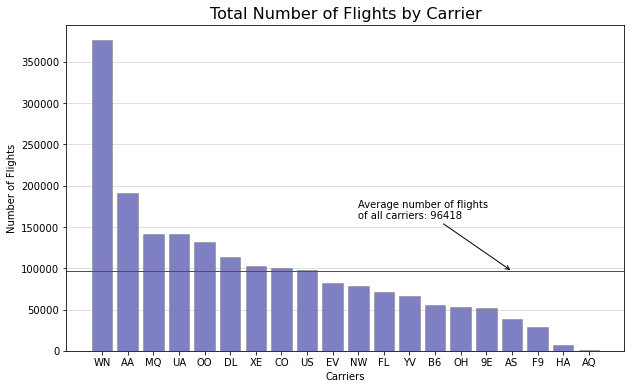

In [43]:
values1 = df["UniqueCarrier"].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(values1.index, values1,
       color = "darkblue",
       edgecolor="grey",
       alpha = 0.5)

# Horizontal line that indicates the mean of flights of all carriers
ax.axhline(values1.mean(),
           color='brown',
           linestyle='-',
           linewidth= 1)
# Annotate mean with arrow
ax.annotate('Average number of flights\nof all carriers: ' + str(int(values1.mean())),
            xy=(16,values1.mean()),
            xytext=(10,160000),
            arrowprops=dict(arrowstyle='->'))

ax.set(xlabel = "Carriers", 
       ylabel = "Number of Flights")
ax.set_title("Total Number of Flights by Carrier", size=16)

ax.grid(axis="y", color="grey", alpha=0.3)

plt.savefig("plot1.png")

plt.show()

### 1.2. Visualització de la variable numérica ArrDelay

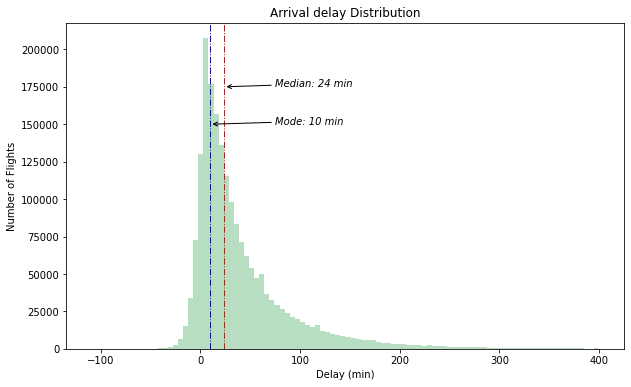

In [44]:
# Mask to remove outliers
mask = df["ArrDelay"] <= 400
values2 = df["ArrDelay"][mask]

# Median and mode of ArrDelay
median = values2.median()
mode = values2.mode()[0]

fig, ax = plt.subplots(figsize=(10, 6))
n_bins = int(500/5)

ax.hist(values2,
        bins = n_bins,
        color = "#88c999",
        alpha=0.6)

ax.set(xlabel = "Delay (min)",
       ylabel = "Number of Flights",
       title = "Arrival delay Distribution")

# Annotate median
ax.axvline(median, color='red', linestyle='-.', linewidth= 1)
ax.annotate('Median: ' + str(int(median)) + " min",
             xy = (median, 175000),
             xytext = (75, 175000),
             style="italic",
             arrowprops=dict(arrowstyle='->'))

# Annotate mode
ax.axvline(mode, color='blue', linestyle='-.', linewidth= 1)
ax.annotate('Mode: ' + str(int(mode)) + " min",
             xy = (mode, 150000),
             xytext = (75, 150000),
             style="italic",
             arrowprops=dict(arrowstyle='->'))            

plt.savefig("plot2.png")

plt.show()

### 1.3. Visualització de la variable numérica ArrDelay i la variable categórica UniqueCarrier

In [45]:
values3 = df[["UniqueCarrier", "ArrDelay"]]
values3 = values3.groupby("UniqueCarrier").mean()
values3.sort_values(by="ArrDelay", ascending=True, inplace=True)
values3 = values3.T

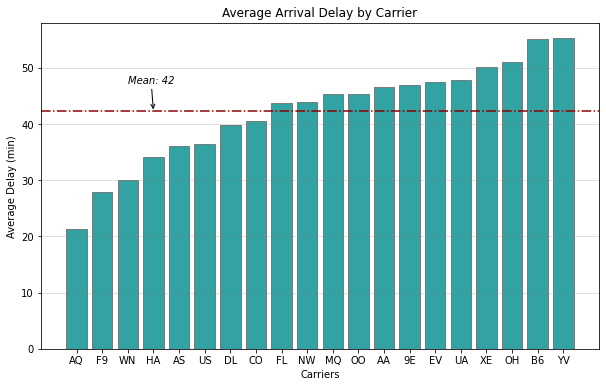

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(values3.columns, 
       values3.loc["ArrDelay"],
       color="darkcyan",
       edgecolor="dimgrey",
       alpha=0.8)

ax.set(xlabel = "Carriers",
       ylabel = "Average Delay (min)",
       title = "Average Arrival Delay by Carrier")

ax.grid(axis="y", color="grey", alpha=0.3)

ax.axhline(values3.loc["ArrDelay"].mean(),
           color="darkred", 
           linestyle="-.",)

ax.annotate('Mean: ' + str(int(values3.loc["ArrDelay"].mean())),
             xy = (values3.columns.get_loc("HA"), values3.loc["ArrDelay"].mean()),
             xytext = (values3.columns.get_loc("WN"), values3.loc["ArrDelay"].mean()+5),
             style="italic",
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3"))

plt.savefig("plot3.png")

plt.show()

### 1.4. Visualització de les variables numériques ArrDelay i DepDelay

In [47]:
values4 = df[["ArrDelay", "DepDelay"]]
x = values4.ArrDelay; y = values4.DepDelay

# Perform a linear regression
res = stats.linregress(x=values4.ArrDelay, y=values4.DepDelay)

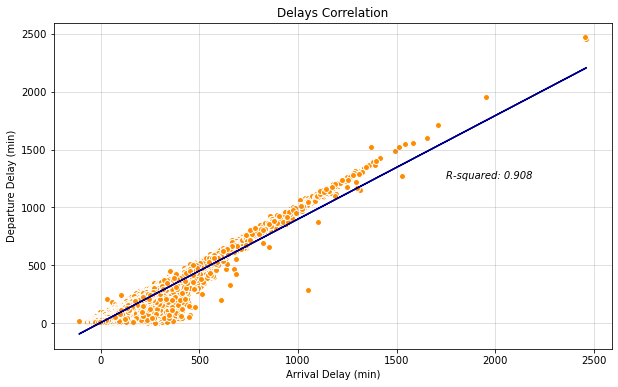

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x=x, y=y,
           color="darkorange",
           edgecolor="white")

# Plot the data along with the fitted line 
plt.plot(x, res.intercept + res.slope * x, 'darkblue')

ax.set(xlabel = "Arrival Delay (min)",
       ylabel = "Departure Delay (min)",
       title = "Delays Correlation")

# Annotate the coefficient of determination (R-squared)
ax.annotate(f"R-squared: {res.rvalue**2:.3f}",
            xy = (1750, 1250),
            style="italic")

plt.grid(color="grey", alpha=0.3)

plt.savefig("plot4a.png")

plt.show()

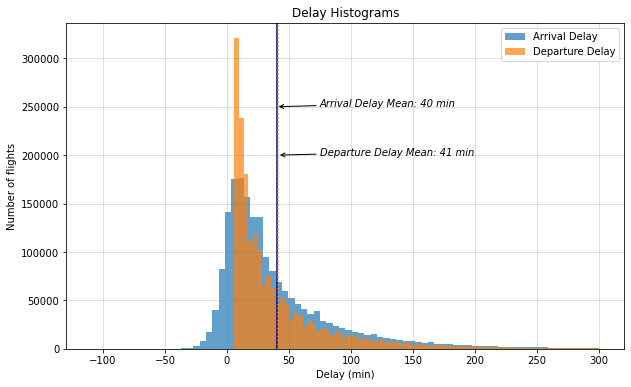

In [49]:
# Mask to remove outliers
mask = (df["ArrDelay"] <= 300) & (df["DepDelay"] <= 300)
values4 = df[["ArrDelay", "DepDelay"]][mask]
x = values4.ArrDelay; y = values4.DepDelay

fig, ax = plt.subplots(figsize=(10,6))

# Plot ArrDelay Histogram
ax.hist(x,
        alpha=0.7,
        bins=80,
        label='Arrival Delay')

# Plot DepDelay Histogram
ax.hist(y,
        alpha=0.7,
        bins=80,
        label='Departure Delay')

ax.set(xlabel = "Delay (min)",
       ylabel = "Number of flights",
       title = "Delay Histograms")


ax.axvline(x.mean(),
           color="darkblue", 
           linestyle="solid",)

ax.annotate('Arrival Delay Mean: ' + str(int(x.mean())) + " min",
             xy = (x.mean(), 250000),
             xytext = (75, 250000),
             style="italic",
             arrowprops=dict(arrowstyle='->'))

ax.axvline(y.mean(),
           color="darkorange", 
           linestyle="dotted")

ax.annotate('Departure Delay Mean: ' + str(int(y.mean())) + " min",
             xy = (y.mean(), 200000),
             xytext = (75, 200000),
             style="italic",
             arrowprops=dict(arrowstyle='->'))

ax.legend()

plt.grid(color="grey", alpha=0.3)

plt.savefig("plot4b.png")

plt.show()

### 1.5. Visualització de les variables ArrDelay, DepDelay i UniqueCarrier

In [50]:
values5 = df[["ArrDelay", "DepDelay", "TotalDelay", "UniqueCarrier"]].groupby("UniqueCarrier").sum()
values5.sort_values(by="TotalDelay", ascending=False, inplace=True)
values5

,ArrDelay,DepDelay,TotalDelay
UniqueCarrier,,,
WN,"11,319,092.00","13,012,255.00","24,331,347.00"
AA,"8,889,066.00","8,857,373.00","17,746,439.00"
UA,"6,733,013.00","7,031,651.00","13,764,664.00"
MQ,"6,396,704.00","6,157,615.00","12,554,319.00"
OO,"5,978,936.00","5,890,399.00","11,869,335.00"
XE,"5,176,042.00","5,153,534.00","10,329,576.00"
DL,"4,535,644.00","4,436,113.00","8,971,757.00"
CO,"4,045,932.00","4,294,574.00","8,340,506.00"
EV,"3,888,131.00","3,946,204.00","7,834,335.00"


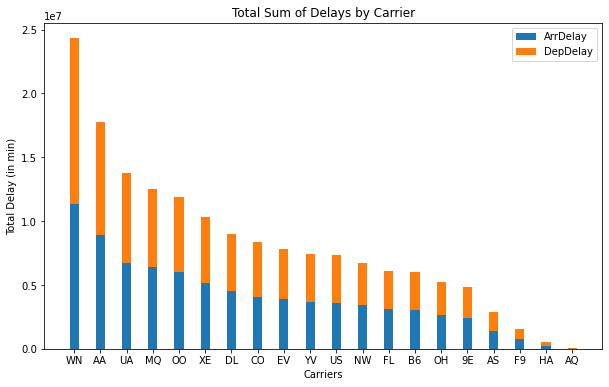

In [51]:
labels = values5.index

fig, ax = plt.subplots(figsize=(10,6))

# Stack the DepDelay bar chart on top of the ArrDelay bar chart
ax.bar(labels, values5.ArrDelay, width = 0.35, label="ArrDelay")
ax.bar(labels, values5.DepDelay, width = 0.35, bottom=values5.ArrDelay, label="DepDelay")

ax.set(xlabel = "Carriers",
       ylabel = "Total Delay (in min)",
       title = "Total Sum of Delays by Carrier")

ax.legend()

plt.savefig("plot5.png")

plt.show()

### 1.6. Visualització de les variables ArrDelay, DepDelay, AirTime i UniqueCarrier

In [52]:
values6 = df[["ArrDelay", "DepDelay", "AirTime", "UniqueCarrier"]]
values6 = values6.groupby("UniqueCarrier").mean()
values6["CarrierName"] = d["CarrierName"]

In [53]:
# Generate a list with a random color for each carrier
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(values6.shape[0])]

values6["Color"] = color
values6

,ArrDelay,DepDelay,AirTime,CarrierName,Color
UniqueCarrier,,,,,
9E,46.94,47.35,1.22,9E: Pinnacle Airlines,#302D46
AA,46.56,46.40,2.41,AA: American Airlines,#F5E0A8
AQ,21.26,26.02,1.91,AQ: Aloha Airlines,#23B936
AS,36.06,37.98,2.16,AS: Alaska Airlines,#B15F32
B6,55.09,54.94,2.50,B6: JetBlue Airways,#B9C201
CO,40.57,43.06,2.76,CO: Continental Airlines,#4D6F22
DL,39.88,39.01,2.20,DL: Delta Airlines,#1E3251
EV,47.55,48.26,1.20,EV: Atlantic Southeast Airlines,#EDA450
F9,27.94,27.67,2.04,F9: Frontier Airlines,#B8D72D


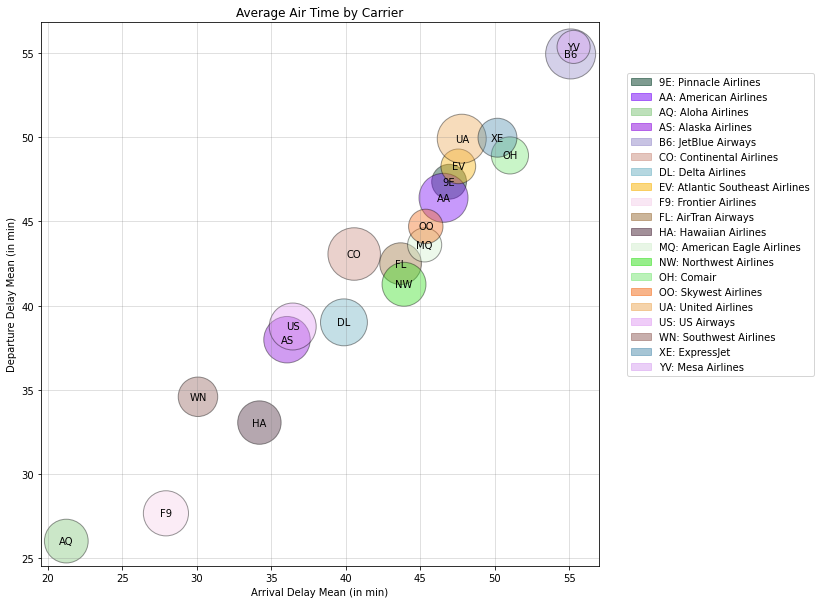

In [27]:
fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(values6.ArrDelay, values6.DepDelay, 
           s=values6.AirTime*1000,
           c=values6.Color,
           edgecolor="black",
           alpha=0.4)

ax.set(xlabel="Arrival Delay Mean (in min)",
       ylabel="Departure Delay Mean (in min)",
       title="Average Air Time by Carrier")

# Label each bubble with its corresponding carrier
for line in range(0,values6.shape[0]):
    ax.text(values6.ArrDelay[line], values6.DepDelay[line], 
            s = values6.index[line],
            ha="center", va="center",
            size ="medium",
            color="black",
            weight="light")

# Create a custom legend indicating the complete name of the carriers
l = []
for i in range(0, values6.shape[0]):
    l.append(mpatches.Patch(color=values6.Color[i],
                            alpha=0.5,
                            label=values6.CarrierName[i]))   
ax.legend(handles=l, loc=(1.05,0.35))

ax.grid(color="grey", alpha=0.3)

plt.savefig("plot6.png", bbox_inches="tight")

plt.show()

## Exercici 2

Les imatges exportades mitjançant `plt.savefig()` es troben al mateix repositori de GitHub on es troba aquesta Notebook.

## Exercici 3

La tasca S03T05 amb les visualitzacions gràfiques integrades pot trobar-se en aquest [enllaç](https://github.com/abelbg/S03T05-Estructures_Dataframe/blob/main/Tasca%205%20-.ipynb).